In [185]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles

#importing the datasets 

veganproducts = pd.read_csv('veganproducts.csv')
cleanskincare = pd.read_csv('cleanskincare.csv')
eyecream_lipcare = pd.read_csv('eyecream_lipcare.csv')
moist_cleans = pd.read_csv('moist_cleans.csv')
sun_treatments = pd.read_csv('sun_treatments.csv')
skincare_data = pd.concat([eyecream_lipcare,moist_cleans,sun_treatments],ignore_index=True)


In [222]:
float("$10000.0".replace('$',''))

10000.0

In [189]:
#REMOVE duplicates
skincare_data = skincare_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [227]:
#scrubbing price field
skincare_data['price_scrub'] = [float(i.replace('$','')) for i in skincare_data['price']]
#skincare_data

In [190]:
#defining new variables
veganproducts['is_vegan']= [1 if cat=='vegan-skin-care' else 0 for cat in veganproducts['category']]
cleanskincare['is_clean']=[1 if cat=='clean-skin-care' else 0 for cat in cleanskincare['category']]
#skincare_data['notvegan']= [1 if i==0 else 0 for i in skincare_data['is_vegan']]
#skincare_data['eye_care']= [1 if cat =='eye-treatment-dark-circle-treatment' else 0 for cat in skincare_data['category']]
#skincare_data['lip_care']= [1 if cat =='lip-treatments' else 0 for cat in skincare_data['category']]


In [ ]:
#DEFINING RATING
skincare_data['rating'] = (skincare_data['num_five']*5 + \
                              skincare_data['num_four']*4 + \
                              skincare_data['num_three']*3 + \
                              skincare_data['num_two']*2 + \
                              skincare_data['num_one']*1) / (skincare_data['num_five'] + \
                                                 skincare_data['num_four'] +
                                                 skincare_data['num_three'] + 
                                                 skincare_data['num_two'] +
                                                 skincare_data['num_one'])

In [191]:
#left join the flags 
skincare_data2=pd.merge(skincare_data,veganproducts[['prod_name','is_vegan']], on='prod_name', how='left')
skincare_data3=pd.merge(skincare_data2,cleanskincare[['prod_name','is_clean']],on='prod_name',how='left')
skincare_data = skincare_data3

In [192]:
#skincare_data

In [193]:
skincare_data['is_vegan']=skincare_data['is_vegan'].fillna(0)
skincare_data['is_clean']=skincare_data['is_clean'].fillna(0)

In [195]:
skincare_data['sum_vegan_clean'] = skincare_data['is_vegan'] +skincare_data['is_clean']


In [196]:
skincare_data['sum_vegan_clean'] = skincare_data['is_vegan'] +skincare_data['is_clean']
skincare_data['vegan_and_clean'] = [1 if i==2 else 0 for i in skincare_data['sum_vegan_clean']]
skincare_data['vegan_only'] = np.where(skincare_data.is_vegan==1, \
                                      np.where(skincare_data.vegan_and_clean!=1,1,0),0)
skincare_data['clean_only'] = np.where(skincare_data.is_clean==1, \
                                      np.where(skincare_data.vegan_and_clean!=1,1,0),0)
skincare_data['all_other'] = np.where(skincare_data.is_vegan==0, \
                                      np.where(skincare_data.is_clean==0,1,0),0)



In [232]:
skincare_datasub = skincare_data[['category','vegan_only','clean_only','vegan_and_clean','all_other']]
skincare_datasub=skincare_datasub.groupby('category').agg(sum)

compare_cat= skincare_datasub

In [233]:
#compare_cat=compare_cat.reset_index()
#del compare_cat['index']
#compare_cat

compare_cat = compare_cat.sort_values('all_other')
compare_cat

,vegan_only,clean_only,vegan_and_clean,all_other
category,,,,
cleanser,9,28,34,116
sunscreen-sun-protection,16,21,36,116
lip-treatments,5,30,12,129
eye-treatment-dark-circle-treatment,16,28,30,147
facial-treatments,97,71,86,336
moisturizing-cream-oils-mists,76,114,162,476


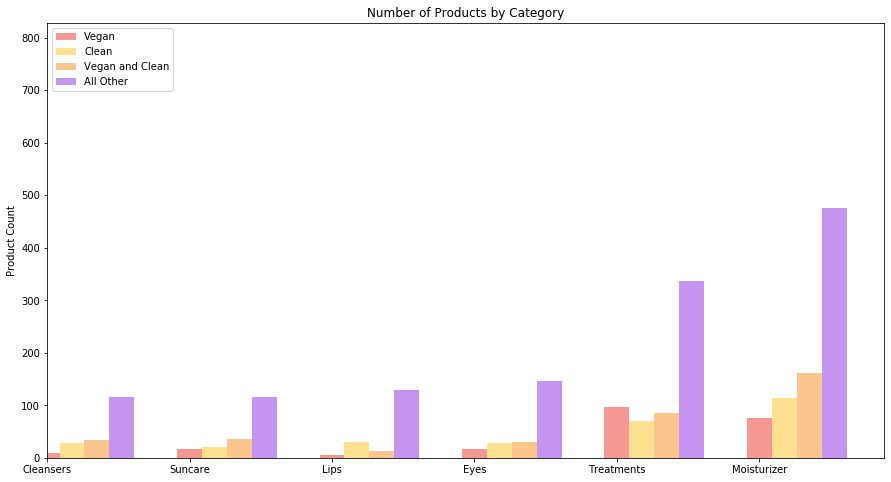

In [218]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


pos = list(range(len(compare_cat['vegan_only'])))
width = 0.175 
    
fig, ax = plt.subplots(figsize=(15,8))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        compare_cat['vegan_only'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224')

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        compare_cat['clean_only'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222')

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        compare_cat['vegan_and_clean'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E') 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using df['post_score'] data,
        compare_cat['all_other'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#8A2BE2')



# Set the y axis label
ax.set_ylabel('Product Count')

# Set the chart's title
ax.set_title('Number of Products by Category')
             
# Set the labels for the x ticks
labels = ['Cleansers', 'Suncare','Lips','Eyes','Treatments','Moisturizer']
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(0, max(pos)+width*5)
plt.ylim([0, max(compare_cat['vegan_only'] + compare_cat['clean_only'] + compare_cat['vegan_and_clean'] + compare_cat['all_other'])] )

# Adding the legend and showing the plot
plt.legend(['Vegan', 'Clean', 'Vegan and Clean', 'All Other'], loc='upper left')
plt.show()

In [244]:
#PRICE ANALYSIS

skincare_data['vegan_clean_price'] = skincare_data['vegan_and_clean'] * skincare_data['price_scrub']
skincare_data['vegan_price'] = skincare_data['vegan_only'] * skincare_data['price_scrub']
skincare_data['clean_price'] = skincare_data['clean_only'] * skincare_data['price_scrub']
skincare_data['other_price'] = skincare_data['all_other'] * skincare_data['price_scrub']

#skincare_data

In [252]:
skincare_datasub = skincare_data[['category','vegan_clean_price','vegan_price','clean_price','other_price', \
                                 'vegan_only','clean_only','vegan_and_clean','all_other']]
skincare_datasub=skincare_datasub.groupby('category').agg(sum)

compare_cat= skincare_datasub

In [253]:
compare_cat=compare_cat.reset_index()
compare_cat

,category,vegan_clean_price,vegan_price,clean_price,other_price,vegan_only,clean_only,vegan_and_clean,all_other
0,cleanser,954.0,230.00,1054.00,3444.99,9,28,34,116
1,eye-treatment-dark-circle-treatment,1742.0,1212.00,1728.99,9711.98,16,28,30,147
2,facial-treatments,5808.0,5365.59,6702.98,24324.01,97,71,86,336
3,lip-treatments,237.5,120.00,511.00,3455.00,5,30,12,129
4,moisturizing-cream-oils-mists,8902.0,4561.57,7081.98,31815.47,76,114,162,476
5,sunscreen-sun-protection,1360.0,644.00,837.00,5786.50,16,21,36,116


In [248]:
compare_cat = compare_cat.sort_values('all_other')
compare_cat

In [254]:
compare_cat['price_veganclean']=compare_cat['vegan_clean_price']/compare_cat['vegan_and_clean'] 
compare_cat['price_vegan']=compare_cat['vegan_price']/compare_cat['vegan_only'] 
compare_cat['price_clean']=compare_cat['clean_price']/compare_cat['clean_only'] 
compare_cat['price_other']= compare_cat['other_price']/compare_cat['all_other'] 


In [273]:
cols = ['category','price_veganclean','price_vegan','price_clean','price_other']
compare_cat[cols]

,category,price_veganclean,price_vegan,price_clean,price_other
0,cleanser,28.058824,25.555556,37.642857,29.698190
1,eye-treatment-dark-circle-treatment,58.066667,75.750000,61.749643,66.067891
2,facial-treatments,67.534884,55.315361,94.408169,72.392887
3,lip-treatments,19.791667,24.000000,17.033333,26.782946
4,moisturizing-cream-oils-mists,54.950617,60.020658,62.122632,66.839223
5,sunscreen-sun-protection,37.777778,40.250000,39.857143,49.883621


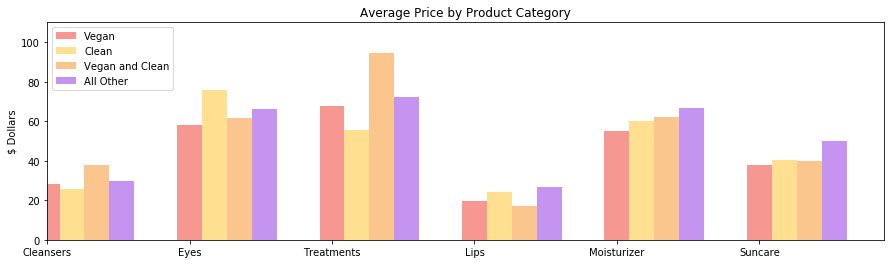

In [277]:
import matplotlib.pyplot as plt
import numpy as np


pos = list(range(len(compare_cat['price_vegan'])))
width = 0.175 
    
fig, ax = plt.subplots(figsize=(15,4))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        compare_cat['price_veganclean'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224')

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        compare_cat['price_vegan'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222')

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        compare_cat['price_clean'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E') 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using df['post_score'] data,
        compare_cat['price_other'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#8A2BE2')



# Set the y axis label
ax.set_ylabel('$ Dollars')

# Set the chart's title
ax.set_title('Average Price by Product Category')
             
# Set the labels for the x ticks
labels = ['Cleansers', 'Eyes','Treatments','Lips','Moisturizer','Suncare']
ax.set_xticklabels(labels)

# Setting the x-axis and y-axis limits
plt.xlim(0, max(pos)+width*5)
plt.ylim([0, 110] )

# Adding the legend and showing the plot
plt.legend(['Vegan', 'Clean', 'Vegan and Clean', 'All Other'], loc='upper left')
plt.show()

In [ ]:
#NumberLoves vs Rating 

In [360]:
'''skincare_data_1 = skincare_data[skincare_data['vegan_and_clean']==1]
skincare_data_2 =  skincare_data[skincare_data['vegan_only']==1]
skincare_data_3 = skincare_data[skincare_data['clean_only']==1]
skincare_data_4 = skincare_data[skincare_data['all_other']==1]

skincare_data_1['product_type'] = 'Vegan and Clean' 
skincare_data_2['product_type'] = 'Vegan'
skincare_data_3['product_type'] = 'Clean'
skincare_data_4['product_type'] = 'Other''''

SyntaxError: EOL while scanning string literal (<ipython-input-360-bc8bf28b68ed>, line 9)

In [366]:
test = pd.concat([skincare_data_1, skincare_data_2,skincare_data_3, skincare_data_4], axis=0)

In [368]:
skincare_data=test

[None]

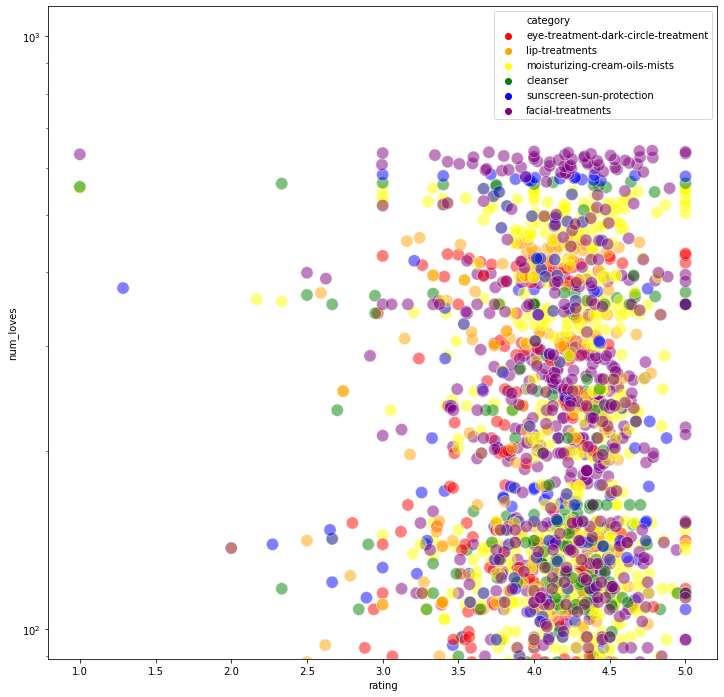

In [376]:
plt.figure(figsize=(12,12))

'''plt.scatter(skincare_data['rating'], skincare_data['num_loves'],alpha=.75)
plt.title('Number of Loves vs Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Loves')
plt.show()'''


import seaborn as sns
g = sns.scatterplot(x=skincare_data['rating'], y=skincare_data['num_loves'], hue="category", 
              data=skincare_data, s=150, alpha = 0.5,
                    palette=['red','orange','yellow','green','blue','purple'], legend='full')
g.set(yscale="log")

[None]

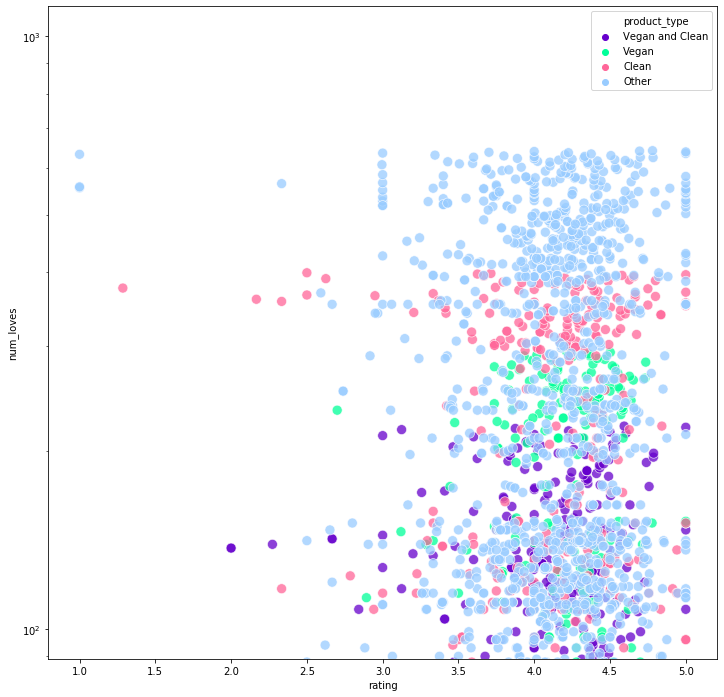

In [387]:
plt.figure(figsize=(12,12))

'''plt.scatter(skincare_data['rating'], skincare_data['num_loves'],alpha=.75)
plt.title('Number of Loves vs Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Loves')
plt.show()'''

import seaborn as sns
g = sns.scatterplot(x=skincare_data['rating'], y=skincare_data['num_loves'], hue="product_type", 
              data=skincare_data, s=100, alpha = 0.75,
                    palette=['#6600cc','#00ff99','#ff6699','#99ccff'], legend='full')
g.set(yscale="log")

In [239]:
#INGREDIENT LIST 


In [ ]:
veganproducts = 
cleanproducts = 
otherproducts = 

In [43]:
flat_ingredients = [a for sublist in blank for a in sublist]

In [45]:
dict_vegan = dict((ingredient, flat_ingredients.count(ingredient)) for ingredient in flat_ingredients)
dict_clean = dict((ingredient, flat_ingredients.count(ingredient)) for ingredient in flat_ingredients)
dict_other = dict((ingredient, flat_ingredients.count(ingredient)) for ingredient in flat_ingredients)



In [271]:
#top20 vegan ingredients - show venn diagram 
top20_vegan = sorted(dict_vegan, key=dict_vegan.get)[-20:] 
#top20_clean = 
#top20_other = 

NameError: name 'dict_vegan' is not defined

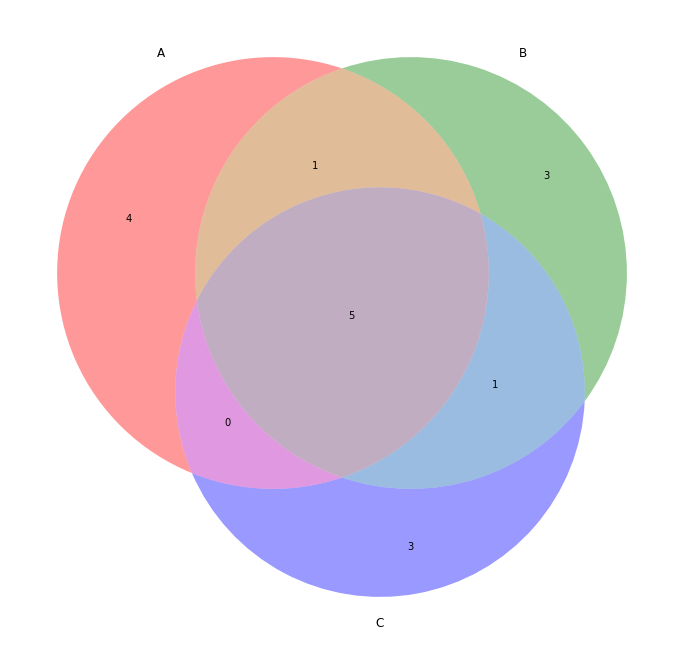

In [51]:
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
lst1 = ["gene1", "gene2", "gene3", "gene4", "gene5", "gene6", "gene7", "gene8", "gene9", "gene10"]
lst2 = ["gene0", "gene1", "gene2", "gene3", "gene8", "gene9", "gene10", "gene11", "gene12", "gene13"]
lst3=["gene0", "gene1", "gene2", "gene3", "gene8", "gene9","gene50","gene70","gene80"]
plt.figure(figsize=(12,12))
venn3([set(lst1), set(lst2),set(lst3)])

In [ ]:

#analyze most popular ingredients - analyze between the three groups - venn diagram 
#analyze amount of products that contain sephora's listed banned toxic products
#